# 直線と円の検出

- <u>直線は２つのパラメーターによって決まる</u>

### 直線の公式
$$
y = ax + b
$$

#### a : 傾き, b : 切片

### 直線を表す別のパラメーター
- $\rho$(ロー) と $\theta$(シータ) を使って直線を表すこともできる

    - $\rho$ : 原点から直線までの最短距離
    - $\theta$ : x軸から直線までの角度

### $\rho$ と $\theta$ で表した直線
$$
y = -\frac{cos\theta}{sin\theta}x + \frac{\rho}{sin\theta}
$$

#### 全ての点の$\theta$ と $\rho$を集め、一番多かったパラメーターを直線とする
1. 画素のある点を探す
2. $\theta$を様々な値に設定し、$\rho$を計算
3. 全ての点に対して 1,2 を繰り返す
4. $\rho$と$\theta$の出現頻度を集計する
5. 出現頻度の最も多いものが直線

#### 直線を検出後の描画に関しての注意
- 下記の形式だと$\theta$ = 0 の時、極端に値が小さい時に分母の部分が発散してしまう：数（値の無限系列が、ある一定の有限値に定まらない）
$$
y = -\frac{cos\theta}{sin\theta}x + \frac{\rho}{sin\theta}
$$

- そこで出てくるのが<u>ベクトルを使用した方法</u>
$$
\overrightarrow{v(t)}=\overrightarrow{v_0}+t*\vec{v}
$$
$$
(x,y)=(x0+t*\sin\theta,y0-t*\cos\theta)
$$

#### ベクトル表示で直線の始点と終点を求める

## 直線の検出

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread("data/src/road.jpg")
img_g = cv2.imread("data/src/road.jpg", 0)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### road image

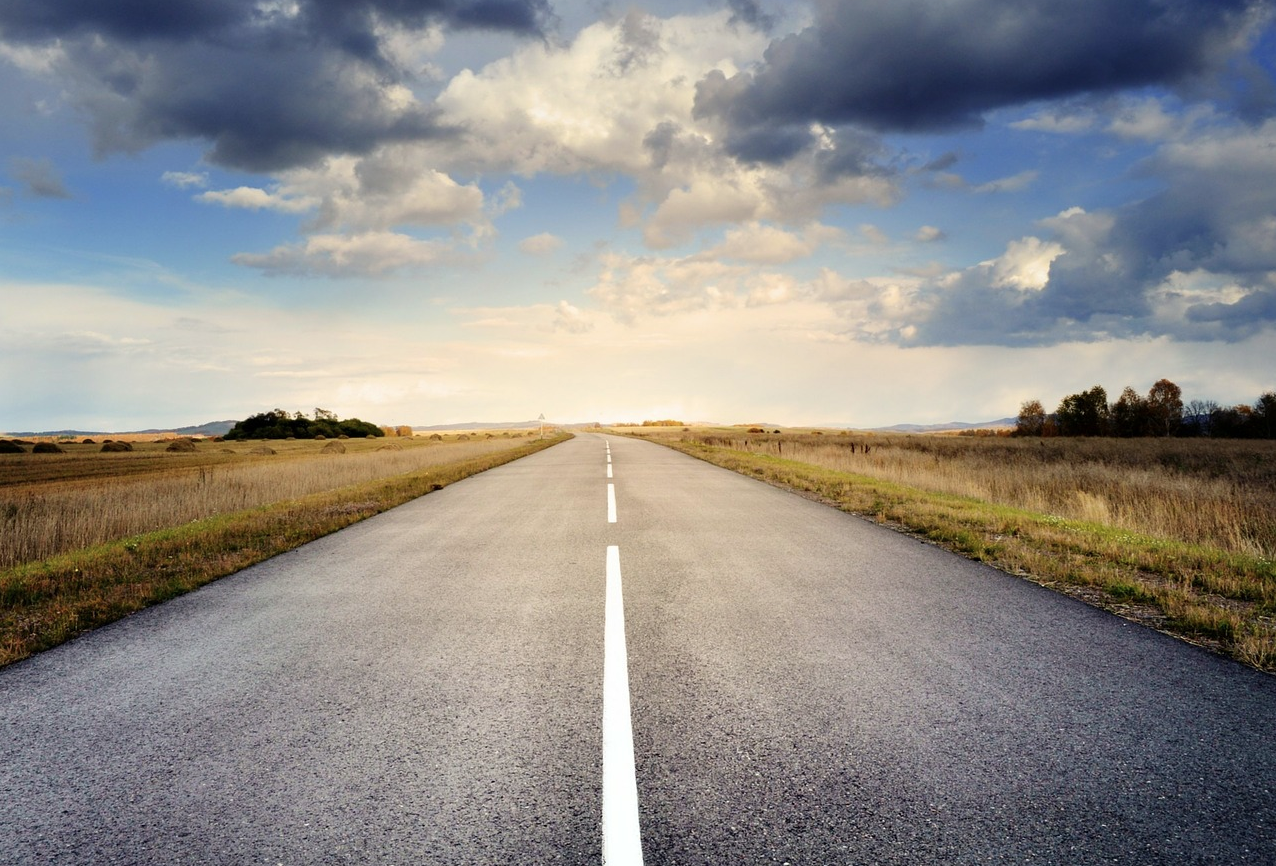

In [3]:
# 前処理として　Canny のエッジ検出を行う:少し閾値を高めの設定にしておく
img_canny = cv2.Canny(img_g, 300, 450)
cv2.imshow("img",img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### road を Canny でエッジを検出させる

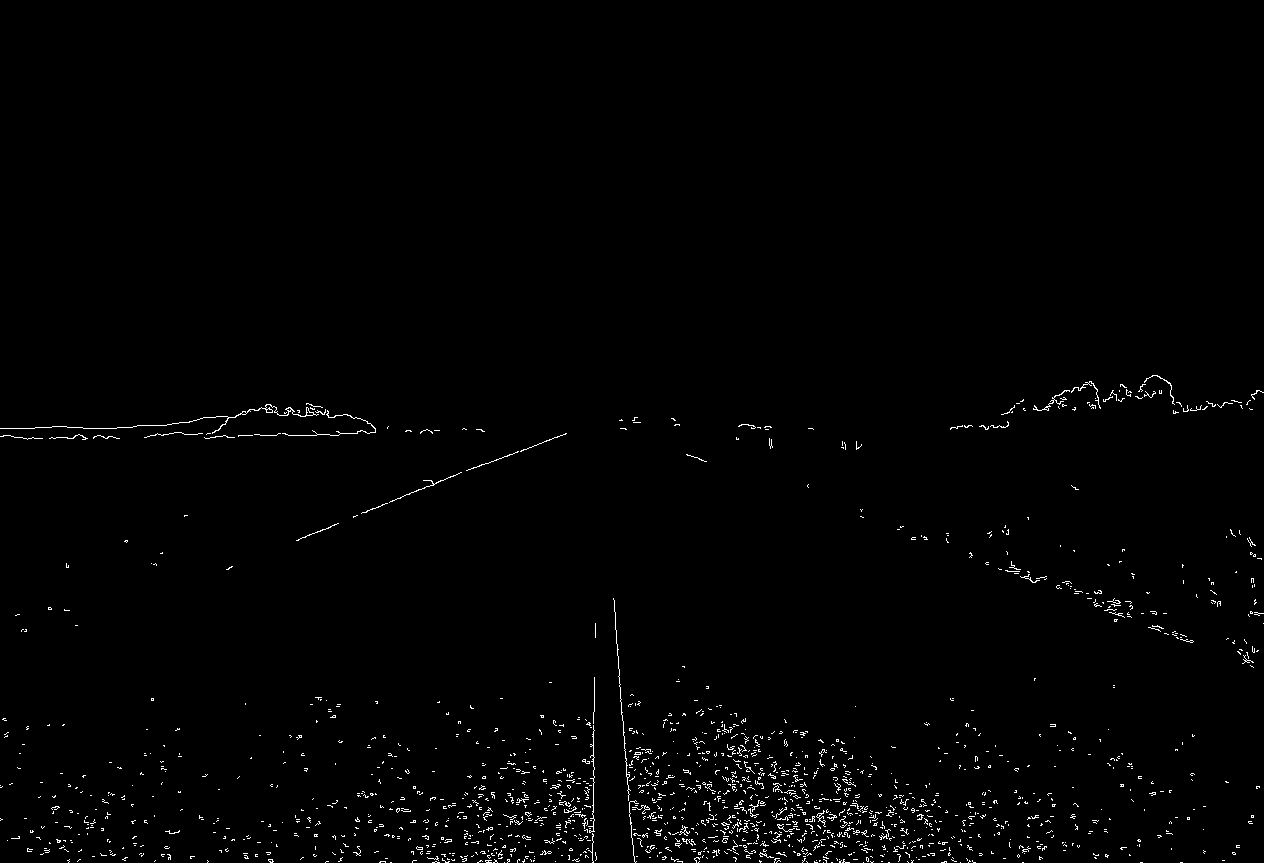

In [4]:
#　HoughLines 関数で直線を検出する
# 渡すパラメーター: 元画像 : rho(ロー)の刻み幅 : どれくらいの幅で theta（シータ）を回していくか : rho,theta の組みが100回以上現れるとlinesに蓄えられる
lines = cv2.HoughLines(img_canny, 1, np.pi/180, 100)

In [5]:
# rho と theta が蓄えられている。これを使用して直線を描く
lines

array([[[-5.8100000e+02,  3.0717795e+00]],

       [[-5.6700000e+02,  3.0543261e+00]],

       [[ 8.7500000e+02,  1.5707964e+00]],

       [[ 4.5400000e+02,  1.5358897e+00]],

       [[ 4.3700000e+02,  1.5533431e+00]],

       [[ 6.0400000e+02,  0.0000000e+00]],

       [[ 8.7900000e+02,  1.5184364e+00]],

       [[ 4.4800000e+02,  1.5533431e+00]],

       [[ 8.8000000e+02,  1.5009831e+00]],

       [[ 6.1700000e+02,  1.7453292e-02]],

       [[ 8.2900000e+02,  1.5707964e+00]],

       [[ 6.1900000e+02,  1.2042772e+00]],

       [[ 8.7300000e+02,  1.5533431e+00]],

       [[ 6.2400000e+02,  1.1868238e+00]],

       [[ 8.7000000e+02,  1.5358897e+00]],

       [[ 8.2600000e+02,  1.5707964e+00]],

       [[ 8.3900000e+02,  1.5882496e+00]],

       [[ 8.5400000e+02,  1.5533431e+00]],

       [[ 8.7800000e+02,  1.5533431e+00]],

       [[ 4.4400000e+02,  1.5707964e+00]],

       [[ 7.8000000e+02,  1.6406095e+00]],

       [[ 8.7600000e+02,  1.5533431e+00]],

       [[ 8.4500000e+02,  1.5707

In [6]:
# for文で上記の数を回して直線を描画させる
for i in lines[:]:
    # rho theta の順番で入っている
    rho = i[0][0]
    theta = i[0][1]
    # 見た目をスッキリさせる為
    a = np.cos(theta)
    b = np.sin(theta)
    # 原点
    x0 = rho * a
    y0 = rho * b
    # 始点と終点
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    # line で描く / 画像 : 始点・終点 : color : 線の太さ
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1) 

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### road image 直線を検出

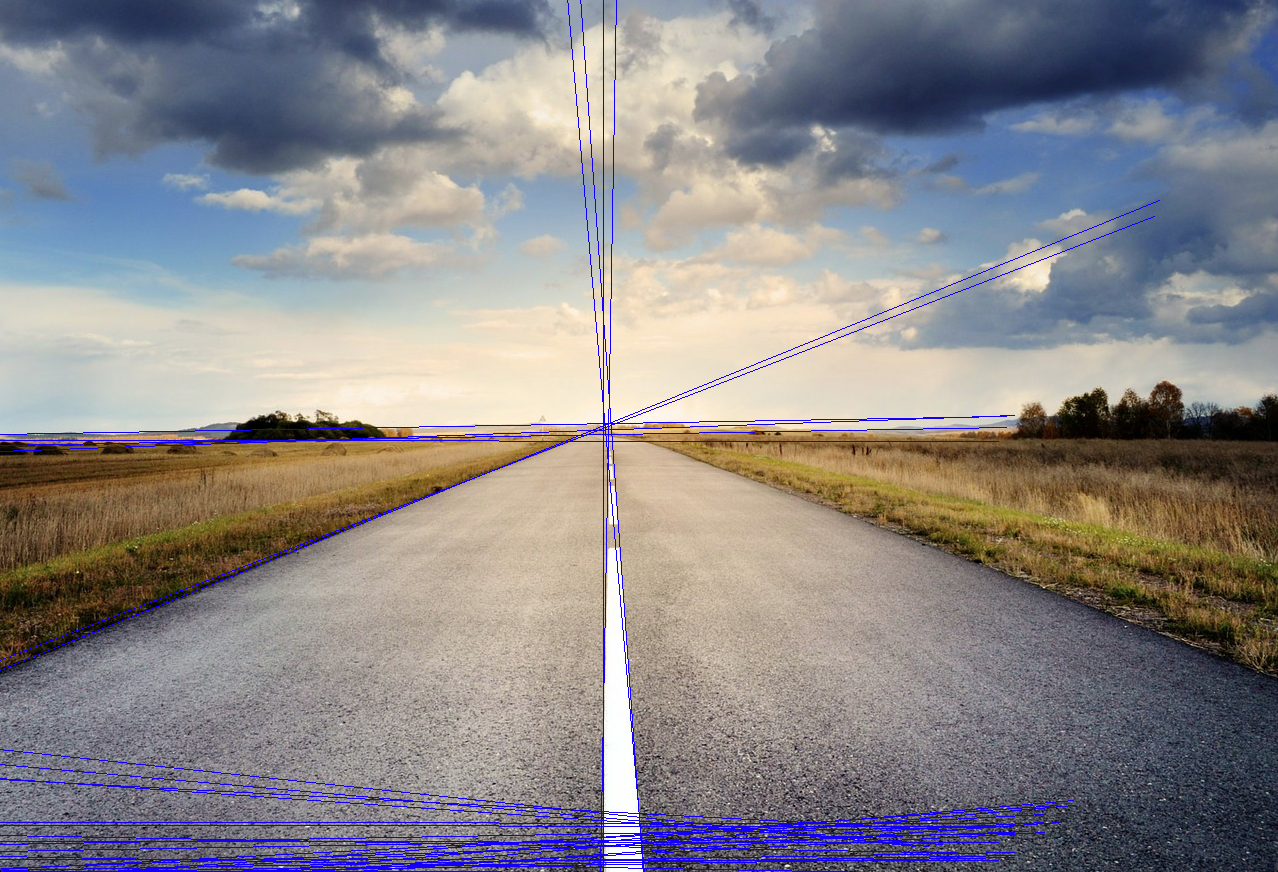

### 直線は検出できたが、ノイズのせいで直線では無いところも検出されてしまっている
- 直線検出は<u>ノイズに弱いというデメリットがある</u>

## 円の検出

In [11]:
img2 = cv2.imread("data/src/grapes.jpg")
img2_g = cv2.imread("data/src/grapes.jpg", 0)
cv2.imshow("img", img２_g)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### grapes image

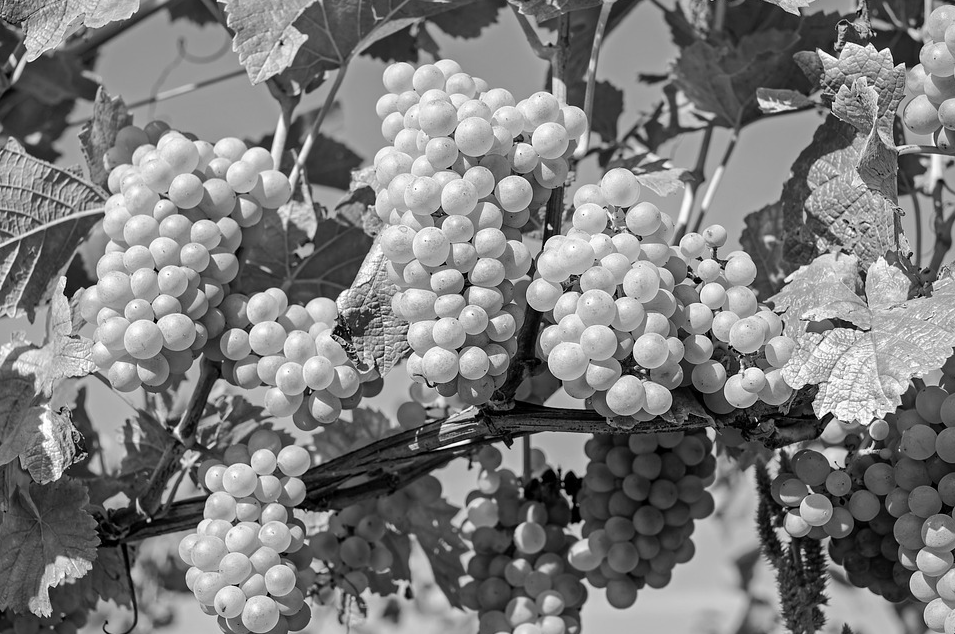

In [12]:
# HoughCircles 関数を用いて円を検出する / 
circles = cv2.HoughCircles?

Docstring:
HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
.   @brief Finds circles in a grayscale image using the Hough transform.
.   
.   The function finds circles in a grayscale image using a modification of the Hough transform.
.   
.   Example: :
.   @include snippets/imgproc_HoughLinesCircles.cpp
.   
.   @note Usually the function detects the centers of circles well. However, it may fail to find correct
.   radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
.   you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
.   to return centers only without radius search, and find the correct radius using an additional procedure.
.   
.   It also helps to smooth image a bit unless it's already soft. For example,
.   GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma or similar blurring may help.
.   
.   @param image 8-bit, single-chann

- ? で使用できるパラメーターを確認することができる
- shift + tab でも確認ができる

HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])

    - dp -> 精度：　基本的には 1 を使用する
    - minDist -> 検出する際に円と円と中心以下の距離：　あまり大きいと円を見逃してしまう
    - param1,2 -> Canny のエッジを使用しているので、その設定
    - minRadius -> 検出する際の円の条件を設定する : これ以上の円は検出する。これ以下の円は検出しないなどの閾値

#### 上記の parameter を上手く設定してあげないとノイズだらけになってしまう

In [13]:
circles = cv2.HoughCircles(img2_g, cv2.HOUGH_GRADIENT, dp =1, minDist=1, param1=20, param2=35, minRadius=1, maxRadius=30)

In [14]:
circles

array([[[516.5, 196.5,  18.3],
        [256.5,  40.5,  21.7],
        [628.5, 397.5,  20.5],
        [462.5, 199.5,  18.2],
        [743.5, 393.5,  17.2],
        [532.5, 540.5,  16.1],
        [343.5, 386.5,  26. ],
        [324.5, 319.5,  19.4],
        [622.5, 189.5,  19.4],
        [282.5, 583.5,  16. ],
        [872.5, 293.5,  21.7],
        [553.5, 143.5,  18.3],
        [391.5, 274.5,  21.7],
        [930.5, 586.5,  18.3],
        [562.5, 345.5,  19.4],
        [755.5, 382.5,  12.7],
        [813.5, 472.5,  19.4],
        [463.5, 348.5,  21.6],
        [ 50.5,  36.5,  19.4],
        [856.5,  90.5,  19.4],
        [356.5, 556.5,  17.2],
        [565.5, 303.5,  21.7],
        [ 77.5, 363.5,  17.2],
        [253.5, 543.5,  21.6],
        [514.5, 262.5,  19.3],
        [783.5, 354.5,  16.1],
        [791.5, 491.5,  18.3],
        [226.5, 515.5,  17.2],
        [266.5, 449.5,  17.2],
        [319.5, 375.5,  17.2],
        [305.5, 300.5,  21.7],
        [181.5, 361.5,  21.7],
        

以前のバージョンだとPython側でfloat型の変数をinteger型に変換してくれていた

そして、その暗黙の型変換が行われなくなっている

- 添字0のシーケンスアイテムの型が間違っている。

### 半径部分をint型に変換

In [16]:
for i in circles[0]:
    x = int(i[0])
    y = int(i[1])
    r = int(i[2])
    cv2.circle(img2, (x, y), r, (255, 0, 0), 1)
cv2.imshow("img",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

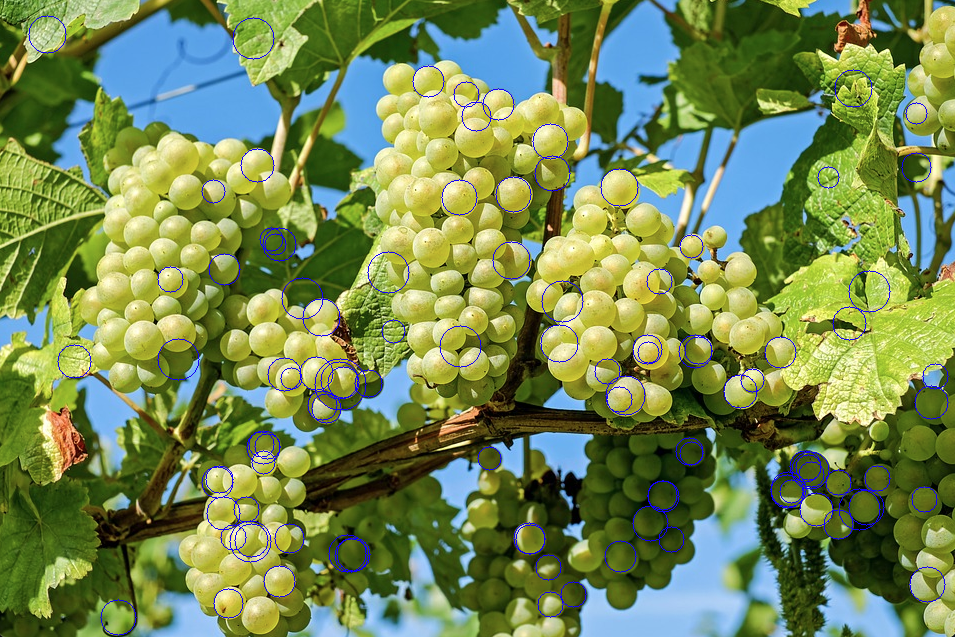

### 円は検出されるが、性能が劣る…
- 色々パラメーターを調整しないといけない手間もかかる
- ノイズがあると結構様々なところに円が検出されてしまう